# MODULENDPRÜFUNG STATISTICS FOR DATA SCIENCE HS18

## Aufgabe 1: Erwartungswert und Schätzmethoden (30 Punkte)

Betrachten Sie die Zufallsvariable X mit der folgenden Dichtefunktion:

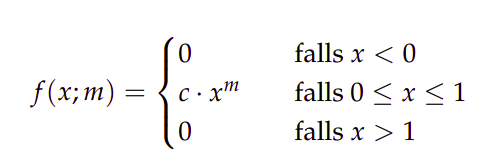

wobei $m$ den Verteilungsparameter darstellt und c ein Faktor ist, der von $m$ abhängt.

---
(a) (5 Punkte) Bestimmen Sie den Faktor $c$, so dass $f(x; m)$ eine Wahrscheinlichkeitsdichtefunktion ist.

Es handelt sich um eine exponentialverteilung. $x^m$ Mit $\lambda = m$

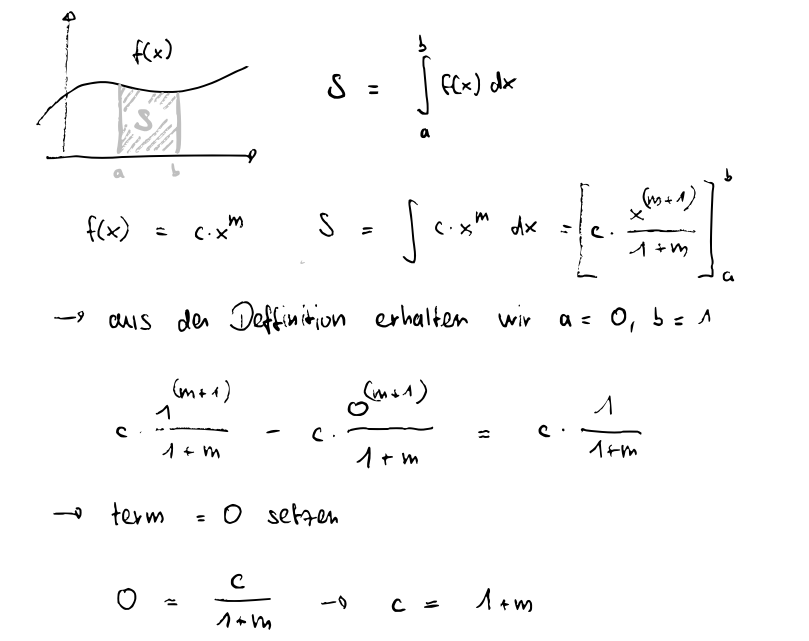

Somit ist die Wahrscheinlichkeitsdichtefunktion (pdf):

$$f(x;m) = (1+m)\cdot x^m$$

---
(b) (6 Punkte) Berechnen Sie den Erwartungswert $E[X]$.

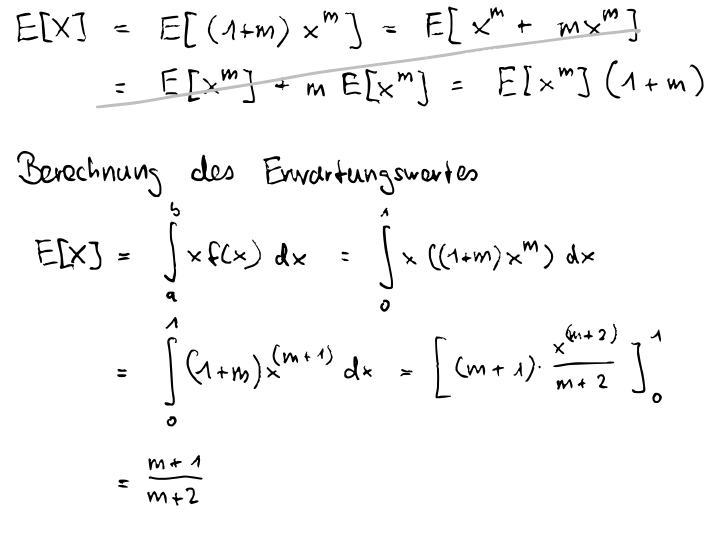

---
(c) (7 Punkte) Berechnen Sie die Varianz $\text{Var}[X]$.

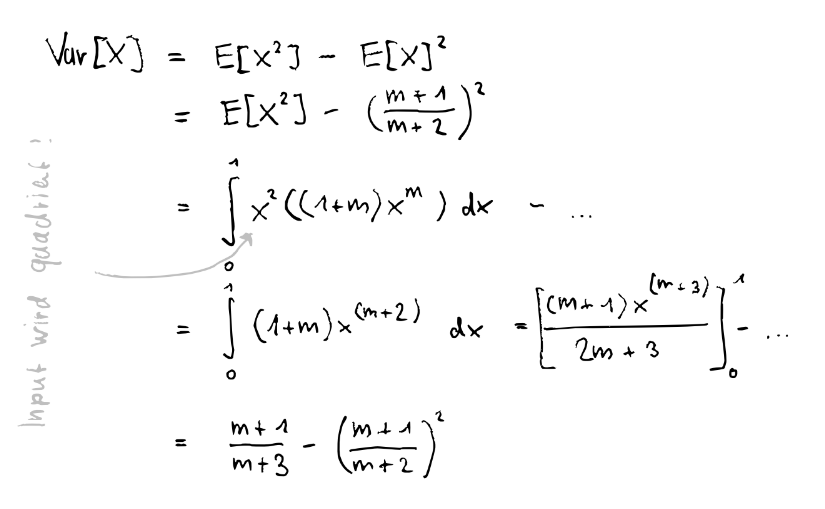

---
(d) (5 Punkte) Es wurden folgende Datenpunkte beobachtet: $x_1 = 0.3, x_2 = 0.5$ und $x_3 = 0.7$. Schätzen Sie den Parameter $m$ mit Hilfe der Momentenmethode.

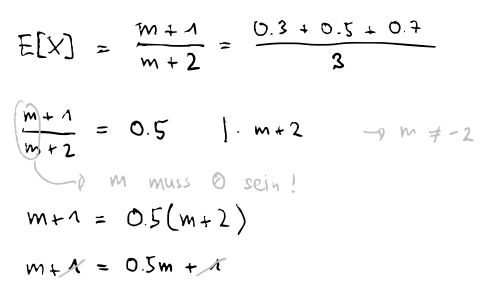

---
(e) (7 Punkte) Schreiben Sie die Likelihood-Funktion für die Beobachtungen $x_1 = 0.3, x_2 = 0.5$ und $x_3 = 0.7$. Beschreiben Sie in 2-3 Sätzen, wie Sie mit der Maximum-Likelihood Methode den Parameter $m$ schätzen.

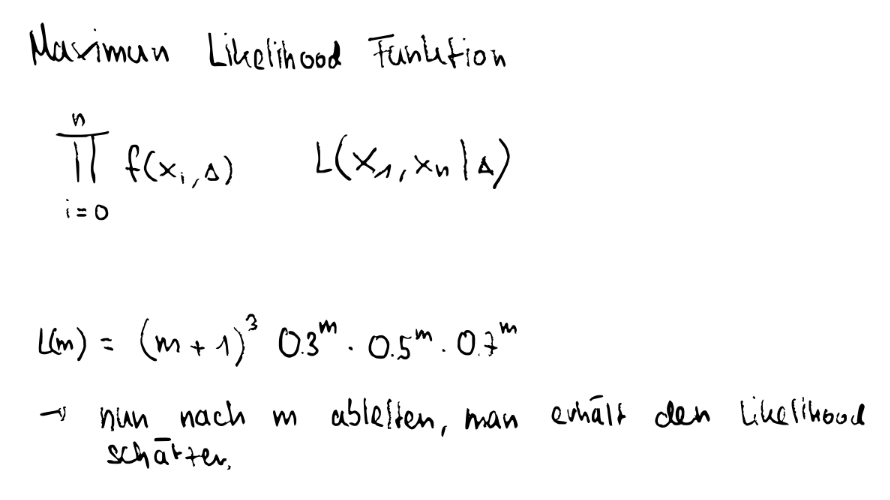

## Aufgabe 2: An die wahren Helden der WM18 - Lebensdauer von Schiedsrichtern . (30 Punkte)

Als ein Schiedsrichter im Jahre 1990 bei den U.S. Major League Baseball Games zusammenbrach und verstarb, wurde spekuliert, dass der mit diesem Beruf verbundene Stress ein ernsthaftes Gesundheitsrisiko darstellt. Forscher haben darauf historische und damals aktuelle
Daten über Schiedsrichter gesammelt, um deren Lebenserwartung zu untersuchen (Cohen et
al., Life expectancy of Major League Baseball Umpires, The Physician and Sportsmedicine, 28(5)
(2000):83-89).

Die in dieser Studie erhobenen Daten beinhalten eine Liste von 227 Schiedsrichtern, die entweder gestorben oder aber pensioniert und immer noch am Leben waren. Sie finden in der
Datei `Lebenserwartung_Schiedsrichter` auf dem USB-Stick im Verzeichnis Austausch
die erhobenen Daten: In der ersten Spalte ist die beobachtete Lebenszeit (Alter) in Jahren
aufgeführt, in der zweiten Spalte befindet sich die Angabe, ob der betreffende Schiedsrichter
tot (= 0) oder noch am Leben (= 1) ist. In der dritten und letzten Spalte ist die aufgrund von
einer Lebensversicherung geschätzte erwartete Lebenszeit aufgeführt. Berücksichtigen Sie in
Teilaufgaben (a) bis (d) bloss die Schiedsrichter, die bereits gestorben sind. Hinweis: Falls Sie
die toten Schiedsrichter nicht von den lebendigen unterscheiden können, dann berücksichtigen Sie alle, ob tot oder lebendig (Abzug 3 Punkte).



---
(a) (10 Punkte) Führen Sie einen t-Test auf dem 1 %-Signifikanzniveau durch, um zu ermitteln, ob Schiedsrichter eine kleinere beobachtete Lebenszeit (Alter) haben als erwartet.
Formulieren Sie die Null- und Alternativhypothese, und geben Sie den Verwerfungsbereich an. Wie lautet das Testergebnis?

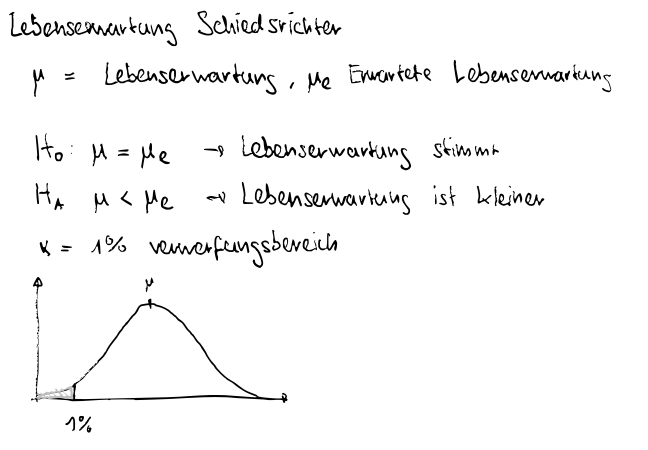

In [5]:
import pandas as pd
import numpy as np

schiedsrichter = pd.read_csv("Schiedsrichter_Lebenserwartung.txt", sep=" ")

In [6]:
schiedsrichter.head()

,age,is_alive,expected_age
0,63,0,70
1,69,0,71
2,58,0,71
3,61,1,70
4,70,0,70


In [10]:
tote_schiedsrichter = schiedsrichter[schiedsrichter["is_alive"] == 0]
lebende_schiedsrichter = schiedsrichter[schiedsrichter["is_alive"] == 1]

In [11]:
tote_schiedsrichter.head()

,age,is_alive,expected_age
0,63,0,70
1,69,0,71
2,58,0,71
4,70,0,70
5,68,0,69


In [12]:
lebende_schiedsrichter.head()

,age,is_alive,expected_age
3,61,1,70
22,53,1,69
26,57,1,68
29,69,1,70
40,60,1,61


In [44]:
expected_mean = tote_schiedsrichter["expected_age"].mean()
expected_std = tote_schiedsrichter["expected_age"].std()

n = len(tote_schiedsrichter["age"])

expected_mean, expected_std, n

(69.01538461538462, 1.7304934135677226, 195)

In [46]:
actual_mean = tote_schiedsrichter["age"].mean()
actual_std = tote_schiedsrichter["age"].std()

actual_mean, actual_std

(68.47692307692307, 7.412251683518682)

In [50]:
st.t.ppf(q=[0.01, 1], loc=actual_mean, scale=actual_std/np.sqrt(n), df=(n - 1))

array([67.23180786,         inf])

Somit ist das vertrauensintervall $[67.23, inf]$. Und der Verwerfungsbereich $[inf, 67.23]$. Wir sehen also dass der erwartete Mittelwert von 69.01 **nicht** im verwerfungsbereich liegt.

In [40]:
import scipy.stats as st

# gleiche person
st.ttest_rel(tote_schiedsrichter["expected_age"], tote_schiedsrichter["age"]).pvalue / 2

0.162427018369938

Da der p wert 0.162427018369938 signifikant groesser als 0.01 ist, wir die Nullhypothese beibehalten und die alternativhypothese nicht verworfen. Ein schiedsrichter hat somit kein signifikant gefaehrlicheres Leben als "andere menschen".

---
(b) (5 Punkte) Erklären Sie die Teststatistik im t-Test in 4-5 Sätzen. Verwenden Sie in Ihrer
Argumentation die folgenden Begriffe:

- Teststatistik
- Zufallsvariable
- standardisierte Zufallsvariable
- Abhängigkeit der Teststatistik vom Stichprobenumfang n
- Zentraler Grenzwertsatz

Man hat i.i.d. Zufallsvariablen welche T-verteilt sind (Normalverteilung  mit diskreten werten). Dann setzt man eine Teststatistik auf, bestehend aus Nullhypothese, Alternativhypothese und Signifikanzniveau. Danach nimmt man Stadardisierte Zufallsvariablen und berechnet daraus mit der Wahrscheinlichkeitsdichtefunktion den Verwerfungsbereich, bzw. das Vertrauensintervall. Die Teststatistik haeng sehr stark vom Stichprobenumfan n ab. Mehr proben heisst, ein aussagekraeftigeres Resultat. Bei mehr Daten werden die Mittelwerte der Stichproben Normalverteilt, dies nennt man den zentralen Grenzwertsatz.

---
(c) (4 Punkte) Geben Sie ein 99%-Vertrauensintervall an, und erklären Sie, wie Sie das
Testergebnis daraus bestimmen.

In [50]:
st.t.ppf(q=[0.01, 1], loc=actual_mean, scale=actual_std/np.sqrt(n), df=(n - 1))

array([67.23180786,         inf])

Somit ist das vertrauensintervall $[67.23, inf]$. Und der Verwerfungsbereich $[inf, 67.23]$. Wir sehen also dass der erwartete Mittelwert von 69.01 **nicht** im verwerfungsbereich liegt.

---
(d) (7 Punkte) Führen Sie einen Vorzeichen- oder Wilcoxon-Test durch. Erläutern Sie die
Annahmen an die Teststatistik, und formulieren Sie die Null- und Alternativhypothese.
Kommen Sie zum selben Testergebnis wie beim t-Test?

Der Vorteil beim Wilcoxon Test ist, dass man keine Verteilung annehmen muss. Ansonsten bleiben Null- und Alternativhypothese gleich.

In [60]:
st.wilcoxon(tote_schiedsrichter["age"], tote_schiedsrichter["expected_age"], correction=True, alternative="less")

WilcoxonResult(statistic=8640.0, pvalue=0.6706932347429935)

Der p-wert ist signifikant groesser als 0.01 also wird die nullhypothese klar beibehalten. Das heisst schiedsrichter habe statistisch gesehen kein gefaehrlicheres Leben als "normale menschen"

---
(e) (4 Punkte) Geben Sie die mittlere beobachtete Lebenszeit (Alter) der noch lebenden
Schiedsrichter mit relativem Fehler an.

In [70]:
age_mean = lebende_schiedsrichter["age"].mean()
age_std = lebende_schiedsrichter["age"].std() # /!\ pandas rechnet empirische standardabweichung, numpy nicht!

alive_n = len(lebende_schiedsrichter["age"])

age_mean, age_std

(59.125, 5.6382907499210395)

In [71]:
abs_fehler = age_std / np.sqrt(alive_n)
abs_fehler

0.9967184058926378

In [72]:
rel_fehler = abs_fehler / age_mean
rel_fehler

0.016857816590150322

Somit ist der absolute Fehler $59.12 \pm 0.997$ und der relative Fehler $0.017$